In [133]:
# Importing Important libraries
import numpy as np # For Scientific Computation
import matplotlib
import matplotlib.pyplot as plt

In [1]:
# Fetching of data
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
# Retrieving features and labels
X = mnist['data']
Y = mnist['target']

In [105]:
# Converting into NumPy array with integer datatype
X = np.array(X , dtype = 'int32')
Y = np.array(Y , dtype = 'int32')

In [123]:
# Reshaping
Y = Y.reshape(1,70000)
X = X.reshape(70000,-1).T
print(X.shape)

(784, 70000)


In [148]:
Lets_plot = X[:,60000]
Lets_plot_image = Lets_plot.reshape(28,28)
print(Lets_plot_image.shape)

(28, 28)


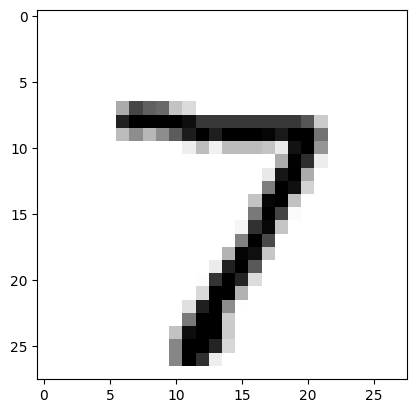

In [149]:
plt.imshow(Lets_plot_image, cmap = matplotlib.cm.binary, interpolation = "nearest")

In [224]:
Y[:,60000]

array([7], dtype=int32)

In [145]:
X_train = X[:,:60000]
X_test  = X[:,60000:]
Y_train = Y[:,:60000]
Y_test  = Y[:,60000:]

In [217]:
def initialize_parameters():
  W1 = np.random.rand(16,784) * 0.01
  W2 = np.random.rand(10,16)  * 0.01
  b1 = np.zeros((16,1))
  b2 = np.zeros((10,1))
  # parameters = {
  #     "W1": W1,
  #     "b1": b1,
  #     "W2": W2,
  #     "b2": b2}
  return W1, b1, W2, b2

In [218]:
def ReLU(Z):
  return np.maximum(Z, 0)

def SoftMax(Z2):
  A = np.exp(Z2) / sum(np.exp(Z2))
  return A

def forward_propagation(W1, b1, W2, b2,X):
  Z1 = np.dot(W1,X) + b1
  A1 = ReLU(Z1)
  Z2 = np.dot(W2,A1) + b2
  A2 = SoftMax(Z2)
  return Z1, A1, Z2, A2


In [219]:

def compute_cost(A2, Y):
  m = Y.size
  cost = -1/m * np.sum(np.dot(Y,np.log(A2).T) + np.dot((1-Y),np.log(1-A2).T))
  return cost

In [220]:
def one_hot(Y):
  encoded_array = np.zeros((Y.size, Y.max() + 1))
  encoded_array[np.arange(Y.size), Y] = 1
  encoded_array = encoded_array.T
  return encoded_array

def relu_derivative(Z):
  return Z > 0

def backward_propagation(Z1, A1, Z2, A2, W2, X, Y):
  m = Y.size
  one_hot_Y = one_hot(Y)
  dZ2 = A2 - one_hot_Y
  dW2 = 1/m * np.dot(dZ2,A1.T)
  db2 = 1/m * np.sum(dZ2, axis =1, keepdims = True)
  dZ1 = np.dot(W2.T, dZ2) * relu_derivative(Z1)
  dW1 = 1/m * np.dot(dZ1,X.T)
  db1 = 1/m * np.sum(dZ1,axis = 1, keepdims = True)
  return dW1, db1, dW2, db2


In [221]:
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, Learning_rate):
  # W1 = parameters["W1"]
  # W2 = parameters["W2"]
  # b1 = parameters["b1"]
  # b2 = parameters["b2"]
  W1 = W1 - Learning_rate*dW1
  W2 = W2 - Learning_rate*dW2
  b1 = b1 - Learning_rate*db1
  b2 = b2 - Learning_rate*db2
  # parameters["W1"] = W1
  # parameters["W2"] = W2
  # parameters["b1"] = b1
  # parameters["b2"] = b2
  return W1, b1, W2, b2

In [222]:
def get_predictions(A2):
  return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
  print(predictions, Y)
  return np.sum(predictions == Y)/ Y.size

def Gradient_Descent(X, Y, No_Of_Iterations, Learning_Rate):
  W1, b1, W2, b2 = initialize_parameters()

  for i in range(0, No_Of_Iterations):
    costs = []
    Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X)
    cost = compute_cost(A2, Y)
    dW1, db1, dW2, db2 = backward_propagation(Z1, A1, Z2, A2, W2, X, Y)
    W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, Learning_Rate)
    if i%100 == 0:
      print("Cost after " + str(i) + "th Iteration is " + str(cost))
    if i % 100 == 0 or i == No_Of_Iterations:
      print("Iterations: " + str(i))
      print("Accuracy  :" + str(get_accuracy(get_predictions(A2), Y)))
  return cost

In [223]:
cost = Gradient_Descent(X_train, Y_train, 10000, 0.1)

Cost after 0th Iteration is 126.2400537117219
Iterations: 0
[2 2 2 ... 2 2 2] [[5 0 4 ... 5 6 8]]
Accuracy  :0.0993


<ipython-input-218-e09a892cd200>:5: RuntimeWarning: overflow encountered in exp
  A = np.exp(Z2) / sum(np.exp(Z2))
<ipython-input-218-e09a892cd200>:5: RuntimeWarning: invalid value encountered in divide
  A = np.exp(Z2) / sum(np.exp(Z2))
<ipython-input-219-d98ded0095ed>:3: RuntimeWarning: divide by zero encountered in log
  cost = -1/m * np.sum(np.dot(Y,np.log(A2).T) + np.dot((1-Y),np.log(1-A2).T))


Cost after 100th Iteration is nan
Iterations: 100
[0 0 0 ... 0 0 0] [[5 0 4 ... 5 6 8]]
Accuracy  :0.09871666666666666


KeyboardInterrupt: ignored